In [1]:
# https://www.tensorflow.org/tutorials/structured_data/time_series
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (16, 8)
#mpl.rcParams['axes.grid'] = False

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [3]:
tt_imputed_full_file_name = 'Data/test_train_imputed.pkl'
df = pd.read_pickle(tt_imputed_full_file_name)

In [4]:
pd.set_option('display.max_columns', None)
df

station_id,26,27,28,29,31,32,33,34,35,38,39,40,41,42,43,44,45,46,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464
2002-01-31,0.084979,0.024494,0.052486,0.033584,0.024094,0.129039,0.023635,0.013464,0.025457,0.144042,0.047908,0.261581,0.001678,0.143937,0.070532,0.003470,0.058665,0.001658,0.001496,0.222437,0.121403,0.038712,0.087059,0.009524,0.079728,0.193349,0.010686,0.006802,0.166906,0.044060,0.132612,0.002758,0.005171,0.014170,0.101161,0.001825,0.003310,0.015084,0.007285,0.012281,0.006085,0.016705,0.012061,0.038678,0.002660,0.004577,0.010482,0.001093,0.001099,0.005267,0.868951,0.715468,0.466652,0.470439,0.539561,0.823631,0.744542,0.497646,0.185128,0.383304,0.323502,0.544846,0.067856,0.161180,0.093716,0.359543,0.176347,0.038977,0.114261,0.137578,0.031812,0.093287,0.234939,0.049637,0.006802,0.125377,0.499697,0.099152,0.013519,0.157384,0.122028,0.031680,0.034492,0.116397
2002-02-28,0.079550,0.023708,0.048293,0.032956,0.023515,0.123104,0.022246,0.013223,0.024746,0.141029,0.046472,0.252585,0.001521,0.137251,0.067610,0.003295,0.053573,0.001711,0.001308,0.207839,0.112253,0.037746,0.081295,0.008500,0.075292,0.181825,0.009781,0.005866,0.158088,0.040140,0.124818,0.002417,0.005075,0.013894,0.093021,0.001714,0.003138,0.015112,0.007017,0.011879,0.005488,0.016706,0.011353,0.037158,0.002459,0.004356,0.009582,0.001043,0.001090,0.005086,0.812379,0.660391,0.428383,0.427034,0.496669,0.765851,0.680767,0.468366,0.171533,0.351505,0.298361,0.519209,0.061063,0.149731,0.088018,0.340470,0.165602,0.036146,0.106966,0.126254,0.028478,0.083734,0.214891,0.045749,0.006432,0.112651,0.455085,0.090210,0.012430,0.146251,0.111372,0.029863,0.031562,0.104315
2002-03-31,0.103057,0.029333,0.051945,0.036387,0.026754,0.146406,0.025984,0.015610,0.027670,0.157588,0.053672,0.290083,0.001737,0.158015,0.077412,0.003728,0.060866,0.001926,0.001535,0.225097,0.133037,0.040850,0.096186,0.009501,0.084988,0.201587,0.010744,0.006376,0.179050,0.040014,0.148466,0.003024,0.005279,0.014561,0.100424,0.001702,0.003278,0.016579,0.007499,0.012984,0.006072,0.017556,0.012309,0.044179,0.002780,0.005091,0.011433,0.001256,0.001311,0.006064,0.880137,0.722726,0.476633,0.509003,0.546668,0.842599,0.734901,0.505107,0.188526,0.381739,0.321143,0.599891,0.067736,0.162873,0.099576,0.379765,0.175184,0.040655,0.121986,0.135840,0.030284,0.091642,0.224449,0.050076,0.006961,0.123702,0.494695,0.094906,0.013402,0.162369,0.120730,0.030988,0.034328,0.115487
2002-04-30,0.102181,0.029270,0.051007,0.035781,0.028017,0.148669,0.025848,0.016378,0.027597,0.161930,0.056398,0.291423,0.002082,0.165340,0.082172,0.004345,0.063712,0.002136,0.001781,0.230523,0.129694,0.041973,0.097801,0.010570,0.090395,0.201193,0.011841,0.007384,0.192373,0.043364,0.149851,0.003110,0.005282,0.014855,0.106382,0.001674,0.003769,0.015686,0.008018,0.013617,0.006928,0.018405,0.013574,0.045707,0.002828,0.005467,0.012322,0.001456,0.001721,0.006451,0.897782,0.741273,0.498265,0.510820,0.570199,0.849604,0.757622,0.522922,0.195504,0.396857,0.343076,0.603790,0.070892,0.177520,0.103582,0.386652,0.184323,0.043825,0.126761,0.146649,0.032767,0.097751,0.237828,0.055039,0.007822,0.126040,0.513146,0.102990,0.014929,0.166675,0.127502,0.035397,0.036101,0.121156
2002-05-31,0.113216,0.022125,0.047346,0.044722,0.030978,0.159405,0.027594,0.018580,0.031516,0.167321,0.061217,0.294899,0.002365,0.178457,0.097716,0.005655,0.068676,0.002325,0.003348,0.248476,0.141523,0.053489,0.120171,0.013918,0.117939,0.238743,0.013376,0.008952,0.224656,0.068221,0.164345,0.003543,0.006375,0.022270,0.113209,0.002701,0.005293,0.021311,0.011726,0.017855,0.012644,0.026273,0.017146,0.053204,0.004266,0.006282,0.013146,0.001882,0.002138,0.007328,0.924678,0.787257,0.526708,0.525958,0.599008,0.869573,0.790910,0.538820,0.214965,0.425145,0.366252,0.635607,0.081826,0.203224,0.116654,0.433182

In [5]:
date_time = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(datetime.datetime.timestamp)

day = 24*60*60
year = (365.2425)*day

df['yr_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['yr_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [6]:
df

station_id,26,27,28,29,31,32,33,34,35,38,39,40,41,42,43,44,45,46,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464,yr_sin,yr_cos
2002-01-31,0.084979,0.024494,0.052486,0.033584,0.024094,0.129039,0.023635,0.013464,0.025457,0.144042,0.047908,0.261581,0.001678,0.143937,0.070532,0.003470,0.058665,0.001658,0.001496,0.222437,0.121403,0.038712,0.087059,0.009524,0.079728,0.193349,0.010686,0.006802,0.166906,0.044060,0.132612,0.002758,0.005171,0.014170,0.101161,0.001825,0.003310,0.015084,0.007285,0.012281,0.006085,0.016705,0.012061,0.038678,0.002660,0.004577,0.010482,0.001093,0.001099,0.005267,0.868951,0.715468,0.466652,0.470439,0.539561,0.823631,0.744542,0.497646,0.185128,0.383304,0.323502,0.544846,0.067856,0.161180,0.093716,0.359543,0.176347,0.038977,0.114261,0.137578,0.031812,0.093287,0.234939,0.049637,0.006802,0.125377,0.499697,0.099152,0.013519,0.157384,0.122028,0.031680,0.034492,0.116397,0.500791,0.865568
2002-02-28,0.079550,0.023708,0.048293,0.032956,0.023515,0.123104,0.022246,0.013223,0.024746,0.141029,0.046472,0.252585,0.001521,0.137251,0.067610,0.003295,0.053573,0.001711,0.001308,0.207839,0.112253,0.037746,0.081295,0.008500,0.075292,0.181825,0.009781,0.005866,0.158088,0.040140,0.124818,0.002417,0.005075,0.013894,0.093021,0.001714,0.003138,0.015112,0.007017,0.011879,0.005488,0.016706,0.011353,0.037158,0.002459,0.004356,0.009582,0.001043,0.001090,0.005086,0.812379,0.660391,0.428383,0.427034,0.496669,0.765851,0.680767,0.468366,0.171533,0.351505,0.298361,0.519209,0.061063,0.149731,0.088018,0.340470,0.165602,0.036146,0.106966,0.126254,0.028478,0.083734,0.214891,0.045749,0.006432,0.112651,0.455085,0.090210,0.012430,0.146251,0.111372,0.029863,0.031562,0.104315,0.844800,0.535083
2002-03-31,0.103057,0.029333,0.051945,0.036387,0.026754,0.146406,0.025984,0.015610,0.027670,0.157588,0.053672,0.290083,0.001737,0.158015,0.077412,0.003728,0.060866,0.001926,0.001535,0.225097,0.133037,0.040850,0.096186,0.009501,0.084988,0.201587,0.010744,0.006376,0.179050,0.040014,0.148466,0.003024,0.005279,0.014561,0.100424,0.001702,0.003278,0.016579,0.007499,0.012984,0.006072,0.017556,0.012309,0.044179,0.002780,0.005091,0.011433,0.001256,0.001311,0.006064,0.880137,0.722726,0.476633,0.509003,0.546668,0.842599,0.734901,0.505107,0.188526,0.381739,0.321143,0.599891,0.067736,0.162873,0.099576,0.379765,0.175184,0.040655,0.121986,0.135840,0.030284,0.091642,0.224449,0.050076,0.006961,0.123702,0.494695,0.094906,0.013402,0.162369,0.120730,0.030988,0.034328,0.115487,0.999487,0.032031
2002-04-30,0.102181,0.029270,0.051007,0.035781,0.028017,0.148669,0.025848,0.016378,0.027597,0.161930,0.056398,0.291423,0.002082,0.165340,0.082172,0.004345,0.063712,0.002136,0.001781,0.230523,0.129694,0.041973,0.097801,0.010570,0.090395,0.201193,0.011841,0.007384,0.192373,0.043364,0.149851,0.003110,0.005282,0.014855,0.106382,0.001674,0.003769,0.015686,0.008018,0.013617,0.006928,0.018405,0.013574,0.045707,0.002828,0.005467,0.012322,0.001456,0.001721,0.006451,0.897782,0.741273,0.498265,0.510820,0.570199,0.849604,0.757622,0.522922,0.195504,0.396857,0.343076,0.603790,0.070892,0.177520,0.103582,0.386652,0.184323,0.043825,0.126761,0.146649,0.032767,0.097751,0.237828,0.055039,0.007822,0.126040,0.513146,0.102990,0.014929,0.166675,0.127502,0.035397,0.036101,0.121156,0.885119,-0.465365
2002-05-31,0.113216,0.022125,0.047346,0.044722,0.030978,0.159405,0.027594,0.018580,0.031516,0.167321,0.061217,0.294899,0.002365,0.178457,0.097716,0.005655,0.068676,0.002325,0.003348,0.248476,0.141523,0.053489,0.120171,0.013918,0.117939,0.238743,0.013376,0.008952,0.224656,0.068221,0.164345,0.003543,0.006375,0.022270,0.113209,0.002701,0.005293,0.021311,0.011726,0.017855,0.012644,0.026273,0.017146,0.053204,0.004266,0.006282,0.013146,0.001882,0.002138,0.007328,0.924678,0.787257,0.526708,0.525958,0.599008,0.869573,0.

In [96]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.6)]
val_df = df[int(n*0.6):int(n*0.8)]
test_df = df[int(n*0.8):]

num_features = df.shape[1]

In [97]:
train_df

station_id,26,27,28,29,31,32,33,34,35,38,39,40,41,42,43,44,45,46,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464,yr_sin,yr_cos
2002-01-31,0.084979,0.024494,0.052486,0.033584,0.024094,0.129039,0.023635,0.013464,0.025457,0.144042,0.047908,0.261581,0.001678,0.143937,0.070532,0.003470,0.058665,0.001658,0.001496,0.222437,0.121403,0.038712,0.087059,0.009524,0.079728,0.193349,0.010686,0.006802,0.166906,0.044060,0.132612,0.002758,0.005171,0.014170,0.101161,0.001825,0.003310,0.015084,0.007285,0.012281,0.006085,0.016705,0.012061,0.038678,0.002660,0.004577,0.010482,0.001093,0.001099,0.005267,0.868951,0.715468,0.466652,0.470439,0.539561,0.823631,0.744542,0.497646,0.185128,0.383304,0.323502,0.544846,0.067856,0.161180,0.093716,0.359543,0.176347,0.038977,0.114261,0.137578,0.031812,0.093287,0.234939,0.049637,0.006802,0.125377,0.499697,0.099152,0.013519,0.157384,0.122028,0.031680,0.034492,0.116397,0.500791,0.865568
2002-02-28,0.079550,0.023708,0.048293,0.032956,0.023515,0.123104,0.022246,0.013223,0.024746,0.141029,0.046472,0.252585,0.001521,0.137251,0.067610,0.003295,0.053573,0.001711,0.001308,0.207839,0.112253,0.037746,0.081295,0.008500,0.075292,0.181825,0.009781,0.005866,0.158088,0.040140,0.124818,0.002417,0.005075,0.013894,0.093021,0.001714,0.003138,0.015112,0.007017,0.011879,0.005488,0.016706,0.011353,0.037158,0.002459,0.004356,0.009582,0.001043,0.001090,0.005086,0.812379,0.660391,0.428383,0.427034,0.496669,0.765851,0.680767,0.468366,0.171533,0.351505,0.298361,0.519209,0.061063,0.149731,0.088018,0.340470,0.165602,0.036146,0.106966,0.126254,0.028478,0.083734,0.214891,0.045749,0.006432,0.112651,0.455085,0.090210,0.012430,0.146251,0.111372,0.029863,0.031562,0.104315,0.844800,0.535083
2002-03-31,0.103057,0.029333,0.051945,0.036387,0.026754,0.146406,0.025984,0.015610,0.027670,0.157588,0.053672,0.290083,0.001737,0.158015,0.077412,0.003728,0.060866,0.001926,0.001535,0.225097,0.133037,0.040850,0.096186,0.009501,0.084988,0.201587,0.010744,0.006376,0.179050,0.040014,0.148466,0.003024,0.005279,0.014561,0.100424,0.001702,0.003278,0.016579,0.007499,0.012984,0.006072,0.017556,0.012309,0.044179,0.002780,0.005091,0.011433,0.001256,0.001311,0.006064,0.880137,0.722726,0.476633,0.509003,0.546668,0.842599,0.734901,0.505107,0.188526,0.381739,0.321143,0.599891,0.067736,0.162873,0.099576,0.379765,0.175184,0.040655,0.121986,0.135840,0.030284,0.091642,0.224449,0.050076,0.006961,0.123702,0.494695,0.094906,0.013402,0.162369,0.120730,0.030988,0.034328,0.115487,0.999487,0.032031
2002-04-30,0.102181,0.029270,0.051007,0.035781,0.028017,0.148669,0.025848,0.016378,0.027597,0.161930,0.056398,0.291423,0.002082,0.165340,0.082172,0.004345,0.063712,0.002136,0.001781,0.230523,0.129694,0.041973,0.097801,0.010570,0.090395,0.201193,0.011841,0.007384,0.192373,0.043364,0.149851,0.003110,0.005282,0.014855,0.106382,0.001674,0.003769,0.015686,0.008018,0.013617,0.006928,0.018405,0.013574,0.045707,0.002828,0.005467,0.012322,0.001456,0.001721,0.006451,0.897782,0.741273,0.498265,0.510820,0.570199,0.849604,0.757622,0.522922,0.195504,0.396857,0.343076,0.603790,0.070892,0.177520,0.103582,0.386652,0.184323,0.043825,0.126761,0.146649,0.032767,0.097751,0.237828,0.055039,0.007822,0.126040,0.513146,0.102990,0.014929,0.166675,0.127502,0.035397,0.036101,0.121156,0.885119,-0.465365
2002-05-31,0.113216,0.022125,0.047346,0.044722,0.030978,0.159405,0.027594,0.018580,0.031516,0.167321,0.061217,0.294899,0.002365,0.178457,0.097716,0.005655,0.068676,0.002325,0.003348,0.248476,0.141523,0.053489,0.120171,0.013918,0.117939,0.238743,0.013376,0.008952,0.224656,0.068221,0.164345,0.003543,0.006375,0.022270,0.113209,0.002701,0.005293,0.021311,0.011726,0.017855,0.012644,0.026273,0.017146,0.053204,0.004266,0.006282,0.013146,0.001882,0.002138,0.007328,0.924678,0.787257,0.526708,0.525958,0.599008,0.869573,0.

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2002-01-31 to 2013-06-30
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   26      138 non-null    float64
 1   27      138 non-null    float64
 2   28      138 non-null    float64
 3   29      138 non-null    float64
 4   31      138 non-null    float64
 5   32      138 non-null    float64
 6   33      138 non-null    float64
 7   34      138 non-null    float64
 8   35      138 non-null    float64
 9   38      138 non-null    float64
 10  39      138 non-null    float64
 11  40      138 non-null    float64
 12  41      138 non-null    float64
 13  42      138 non-null    float64
 14  43      138 non-null    float64
 15  44      138 non-null    float64
 16  45      138 non-null    float64
 17  46      138 non-null    float64
 18  51      138 non-null    float64
 19  103     138 non-null    float64
 20  110     138 non-null    float64
 21  164     138 non-null

In [99]:
val_df

station_id,26,27,28,29,31,32,33,34,35,38,39,40,41,42,43,44,45,46,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464,yr_sin,yr_cos
2013-07-31,0.129227,0.032297,0.047679,0.057316,0.033912,0.158403,0.028312,0.018552,0.036403,0.168647,0.061770,0.274305,0.002302,0.172756,0.104664,0.007268,0.067944,0.002444,0.004913,0.268371,0.146161,0.064122,0.148374,0.013716,0.143982,0.267093,0.015106,0.008692,0.268881,0.076055,0.181970,0.003724,0.007090,0.027547,0.125973,0.003045,0.005829,0.024588,0.015937,0.022735,0.012193,0.033646,0.021802,0.062933,0.005469,0.005786,0.011520,0.001921,0.002391,0.007527,0.873211,0.715937,0.564064,0.529046,0.692878,0.812599,0.739307,0.527622,0.257272,0.395089,0.369331,0.662346,0.086423,0.195117,0.123952,0.511608,0.227202,0.066420,0.171782,0.161741,0.041461,0.109212,0.213950,0.055273,0.010938,0.106901,0.463514,0.106566,0.017753,0.159593,0.127728,0.046914,0.029979,0.117198,-0.480852,-0.876802
2013-08-31,0.126573,0.034692,0.035911,0.055605,0.034058,0.163819,0.030693,0.018657,0.036341,0.171546,0.061348,0.279287,0.003174,0.174312,0.103990,0.006815,0.067231,0.002469,0.004781,0.277256,0.148085,0.065369,0.154691,0.012727,0.147330,0.276510,0.017207,0.008230,0.297201,0.075920,0.156508,0.003565,0.007179,0.027392,0.132712,0.003454,0.005885,0.024106,0.015466,0.021343,0.009933,0.030926,0.019072,0.064802,0.004946,0.006039,0.011644,0.002309,0.002314,0.013213,0.909145,0.680152,0.523198,0.538363,0.706110,0.827151,0.767331,0.549263,0.258349,0.438028,0.383952,0.683813,0.089628,0.191346,0.127104,0.523920,0.235906,0.071977,0.173853,0.164291,0.041431,0.109283,0.212812,0.055305,0.010759,0.111745,0.476949,0.106281,0.018404,0.159174,0.127362,0.048229,0.029632,0.119161,-0.859817,-0.510602
2013-09-30,0.106175,0.032442,0.040218,0.044667,0.032095,0.147600,0.027150,0.016785,0.031915,0.154658,0.058542,0.263775,0.003450,0.164205,0.090580,0.005760,0.064956,0.002300,0.003145,0.255453,0.137632,0.053769,0.136054,0.011358,0.121987,0.242822,0.015281,0.007765,0.245154,0.061068,0.122861,0.003678,0.006081,0.021511,0.125985,0.002842,0.004746,0.019978,0.011792,0.017229,0.010217,0.024954,0.015067,0.052360,0.004308,0.005932,0.011413,0.001845,0.002139,0.014472,0.855913,0.705775,0.451428,0.504053,0.596672,0.776617,0.722450,0.517407,0.243025,0.403532,0.354755,0.619507,0.081482,0.181804,0.123679,0.464521,0.228808,0.068709,0.170092,0.153436,0.037810,0.102245,0.206636,0.053640,0.010081,0.093474,0.470802,0.091050,0.019210,0.151242,0.120091,0.048080,0.028764,0.098686,-0.999804,-0.019800
2013-10-31,0.106302,0.033003,0.048829,0.040741,0.032291,0.149794,0.029941,0.016795,0.031278,0.164571,0.060559,0.283803,0.006343,0.167243,0.087563,0.005303,0.067899,0.002717,0.002187,0.261398,0.140019,0.049464,0.130527,0.010811,0.112788,0.238741,0.017110,0.008381,0.222371,0.054324,0.141377,0.004263,0.006048,0.019389,0.130310,0.002366,0.005511,0.019419,0.010316,0.015364,0.009356,0.022016,0.014968,0.049052,0.004260,0.005737,0.011526,0.001590,0.002929,0.012608,0.909193,0.726516,0.428367,0.536726,0.633738,0.832646,0.766527,0.550035,0.254590,0.420849,0.393149,0.644943,0.084403,0.187373,0.133042,0.478643,0.237836,0.075748,0.181498,0.163015,0.037173,0.106567,0.225723,0.055881,0.009842,0.100840,0.502837,0.090550,0.021133,0.159046,0.123788,0.049741,0.029500,0.109370,-0.871038,0.491216
2013-11-30,0.099929,0.030060,0.045761,0.038122,0.026547,0.146147,0.026514,0.015441,0.029071,0.142771,0.053364,0.255911,0.002489,0.150639,0.079082,0.004234,0.060386,0.002193,0.001798,0.214774,0.129616,0.043718,0.118056,0.010057,0.104595,0.213763,0.015261,0.007750,0.188229,0.048334,0.144065,0.002954,0.005761,0.017230,0.119218,0.001621,0.004095,0.016147,0.009007,0.012724,0.009491,0.018524,0.013267,0.043185,0.003703,0.005319,0.010327,0.001581,0.001884,0.006700,0.813691,0.695338,0.480952,0.496448,0.593870,0.759

In [100]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2013-07-31 to 2017-04-30
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   26      46 non-null     float64
 1   27      46 non-null     float64
 2   28      46 non-null     float64
 3   29      46 non-null     float64
 4   31      46 non-null     float64
 5   32      46 non-null     float64
 6   33      46 non-null     float64
 7   34      46 non-null     float64
 8   35      46 non-null     float64
 9   38      46 non-null     float64
 10  39      46 non-null     float64
 11  40      46 non-null     float64
 12  41      46 non-null     float64
 13  42      46 non-null     float64
 14  43      46 non-null     float64
 15  44      46 non-null     float64
 16  45      46 non-null     float64
 17  46      46 non-null     float64
 18  51      46 non-null     float64
 19  103     46 non-null     float64
 20  110     46 non-null     float64
 21  164     46 non-null  

In [101]:
test_df

station_id,26,27,28,29,31,32,33,34,35,38,39,40,41,42,43,44,45,46,51,103,110,164,175,179,187,191,198,199,200,204,208,209,210,211,212,214,218,219,220,221,222,223,225,227,228,229,230,231,232,233,301,303,305,309,315,321,326,329,335,336,341,342,351,352,353,354,365,381,382,384,386,388,389,390,400,402,405,407,410,420,425,458,460,464,yr_sin,yr_cos
2017-05-31,0.118922,0.036283,0.047779,0.047795,0.031623,0.164394,0.028550,0.019249,0.033551,0.185493,0.061450,0.340295,0.002336,0.188875,0.098798,0.006479,0.076027,0.002527,0.003264,0.264277,0.138762,0.054058,0.142462,0.012923,0.133524,0.266230,0.015841,0.009292,0.263808,0.064821,0.198140,0.003649,0.006860,0.021853,0.149083,0.002127,0.005907,0.020513,0.012149,0.018664,0.012153,0.026633,0.018027,0.049799,0.004645,0.006318,0.016005,0.001937,0.002214,0.007863,0.876947,0.730179,0.639901,0.491254,0.677896,0.910999,0.592537,0.572239,0.277924,0.472735,0.448643,0.654925,0.082302,0.202176,0.138641,0.507926,0.248420,0.059842,0.181821,0.181268,0.040040,0.119398,0.300297,0.059591,0.013458,0.112206,0.223816,0.089069,0.019534,0.114974,0.132762,0.053891,0.028741,0.112247,0.520322,-0.853970
2017-06-30,0.125930,0.038280,0.045803,0.056182,0.032531,0.171553,0.029811,0.019124,0.035759,0.194223,0.061448,0.360504,0.002684,0.190139,0.098512,0.006898,0.079884,0.002496,0.004277,0.277518,0.145939,0.062367,0.153217,0.014713,0.145970,0.282713,0.016908,0.009224,0.278534,0.070834,0.202479,0.003689,0.007316,0.027764,0.148622,0.002636,0.005920,0.023167,0.014780,0.020998,0.013838,0.028975,0.019018,0.057365,0.005010,0.006120,0.015638,0.001981,0.002036,0.007820,0.856882,0.731869,0.654405,0.466540,0.677761,0.965764,0.634730,0.567587,0.280415,0.480578,0.458489,0.672960,0.081475,0.205123,0.140727,0.529060,0.252106,0.062322,0.187604,0.180033,0.040296,0.121524,0.304405,0.060762,0.014821,0.110021,0.200971,0.101357,0.021065,0.112979,0.132800,0.051489,0.028383,0.111736,0.031139,-0.999515
2017-07-31,0.132842,0.040499,0.044833,0.060119,0.033405,0.171757,0.030880,0.019722,0.037429,0.195542,0.062313,0.352076,0.002712,0.188093,0.102960,0.007826,0.078136,0.002435,0.005345,0.284340,0.143505,0.066614,0.162125,0.014856,0.160561,0.293222,0.019003,0.009619,0.292896,0.084597,0.207068,0.004092,0.007815,0.028697,0.143993,0.003321,0.006552,0.024680,0.017204,0.024196,0.017912,0.033589,0.021977,0.060797,0.006259,0.005995,0.014422,0.002106,0.001959,0.008267,0.840461,0.731493,0.626698,0.390914,0.624622,0.965275,0.629775,0.576382,0.292652,0.469796,0.446066,0.677546,0.080858,0.202163,0.143981,0.538478,0.243444,0.065228,0.142888,0.177614,0.039923,0.124959,0.293685,0.058229,0.015353,0.105241,0.155834,0.114041,0.021740,0.145596,0.126592,0.048553,0.027515,0.107835,-0.481304,-0.876554
2017-08-31,0.133321,0.042548,0.047893,0.057018,0.033510,0.177583,0.032510,0.020494,0.037048,0.201211,0.062373,0.370165,0.003531,0.186802,0.100810,0.007076,0.079187,0.002510,0.004542,0.294840,0.154778,0.062526,0.159109,0.014631,0.154715,0.300637,0.019996,0.009778,0.295316,0.073873,0.211430,0.003734,0.007652,0.027543,0.152223,0.003219,0.006405,0.023344,0.016065,0.022318,0.015021,0.030585,0.020110,0.060129,0.005345,0.006643,0.017142,0.001742,0.001896,0.008344,0.888211,0.759864,0.654264,0.360381,0.684228,1.000000,0.674442,0.603701,0.300941,0.494293,0.466565,0.701825,0.083615,0.212777,0.149603,0.542771,0.251741,0.069111,0.093935,0.219461,0.039705,0.122313,0.317752,0.059573,0.011462,0.109578,0.141059,0.110886,0.022053,0.152261,0.127856,0.049742,0.026916,0.114000,-0.860081,-0.510158
2017-09-30,0.116942,0.036065,0.045369,0.050485,0.031718,0.165616,0.030724,0.019677,0.034332,0.185022,0.059546,0.358779,0.003445,0.180284,0.095687,0.006243,0.075423,0.002309,0.004212,0.273444,0.145924,0.056334,0.141811,0.013358,0.137949,0.279755,0.019139,0.008655,0.266047,0.065165,0.187830,0.003538,0.006869,0.024159,0.142763,0.003328,0.005243,0.021319,0.010659,0.019832,0.013379,0.026619,0.017280,0.051452,0.005153,0.006195,0.019704,0.002717,0.001889,0.007798,0.851843,0.713350,0.600373,0.412760,0.632090,0.9358

In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2017-05-31 to 2021-02-28
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   26      46 non-null     float64
 1   27      46 non-null     float64
 2   28      46 non-null     float64
 3   29      46 non-null     float64
 4   31      46 non-null     float64
 5   32      46 non-null     float64
 6   33      46 non-null     float64
 7   34      46 non-null     float64
 8   35      46 non-null     float64
 9   38      46 non-null     float64
 10  39      46 non-null     float64
 11  40      46 non-null     float64
 12  41      46 non-null     float64
 13  42      46 non-null     float64
 14  43      46 non-null     float64
 15  44      46 non-null     float64
 16  45      46 non-null     float64
 17  46      46 non-null     float64
 18  51      46 non-null     float64
 19  103     46 non-null     float64
 20  110     46 non-null     float64
 21  164     46 non-null  

In [103]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

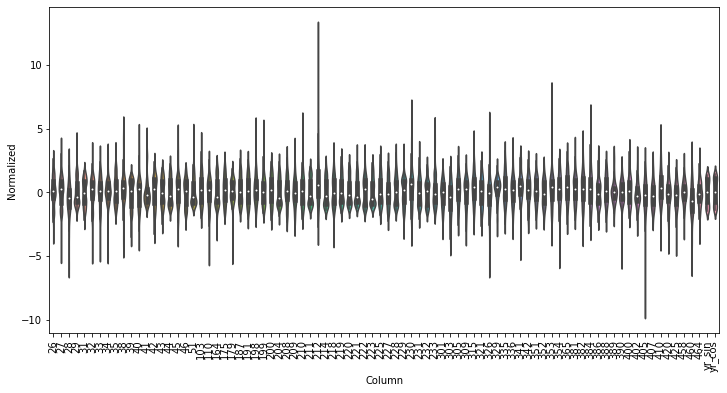

In [104]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [176]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
           train_df=train_df, val_df=val_df, test_df=test_df,
           label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def plot(self, model=None, plot_col=None, max_subplots=3):
        if plot_col is None:
            if self.label_columns is not None:
                plot_col = self.label_columns[0]
            else:
                plot_col = list(self.column_indices)[0]
            
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time (months)')    

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result
    
    @example.setter
    def example(self, value):
        self._example = value
        

# Single Step Predictions

Predict one step into the future, given an input size.

## Single Output Models

Predict only a single output, given a time period of all inputs.

In [177]:
# first_win uses 6 months of data to predict the next month.
first_win = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['458'])
first_win

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['458']

In [178]:
first_win.total_window_size

7

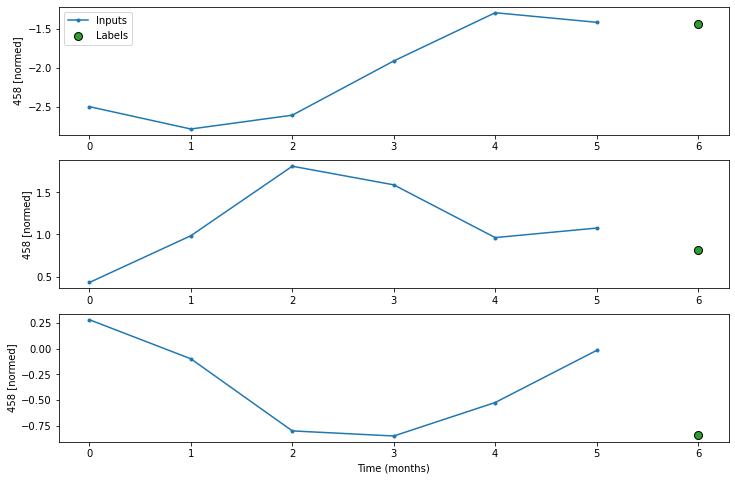

In [179]:
example_window = tf.stack([np.array(train_df[:first_win.total_window_size]),
                           np.array(train_df[50:50+first_win.total_window_size]),
                           np.array(train_df[100:100+first_win.total_window_size])])


example_inputs, example_labels = first_win.split_window(example_window)
first_win.example = example_inputs, example_labels
first_win.plot()

In [180]:
first_win.train.element_spec

(TensorSpec(shape=(None, 6, 86), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [181]:
for example_inputs, example_labels in first_win.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 86)
Labels shape (batch, time, features): (32, 1, 1)


In [182]:
# Uses a single month to predict the next month
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['458'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['458']

In [183]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 86)
Labels shape (batch, time, features): (32, 1, 1)


### Baseline Model

Predicts that the next month is the same as the previous month. Ignores all inputs except for the label.

In [184]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [185]:
baseline = Baseline(label_index=column_indices['458'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

tr_performance = {}
val_performance = {}
performance = {}
tr_performance['Baseline'] = baseline.evaluate(single_step_window.train, verbose=0)
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, verbose=0)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [187]:
# At this time, wide_window is not used to predict, only to display the predictions.
wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1,
    label_columns=['458'])

wide_window

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Label column name(s): ['458']

In [188]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 12, 86)
Output shape: (32, 12, 1)


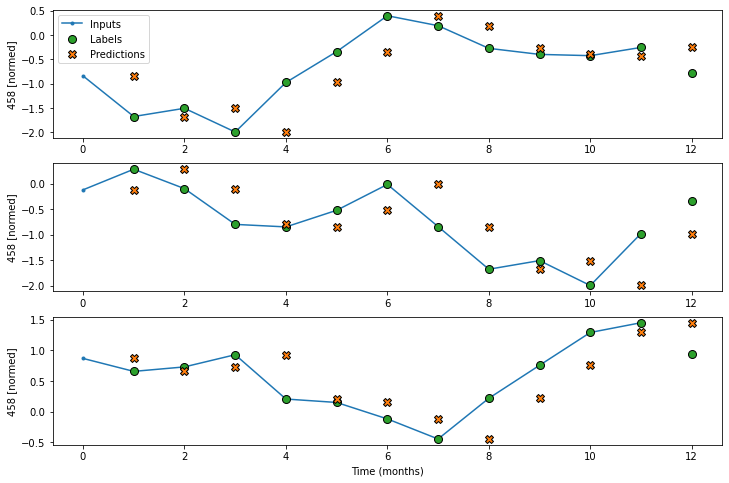

In [189]:
wide_window.plot(baseline)

### Linear Model

Uses a single dense layer between input and output. Trained with a single month input from all inputs.

In [191]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [192]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 86)
Output shape: (32, 1, 1)


In [193]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

In [194]:
history = compile_and_fit(linear, single_step_window)

IPython.display.clear_output()
tr_performance['Linear'] = linear.evaluate(single_step_window.train, verbose=0)
val_performance['Linear'] = linear.evaluate(single_step_window.val, verbose=0)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

In [195]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 12, 86)
Output shape: (32, 12, 1)


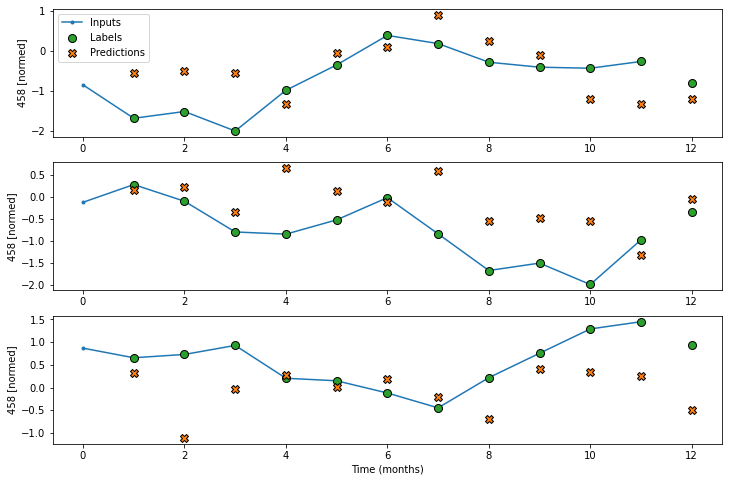

In [196]:
wide_window.plot(linear)

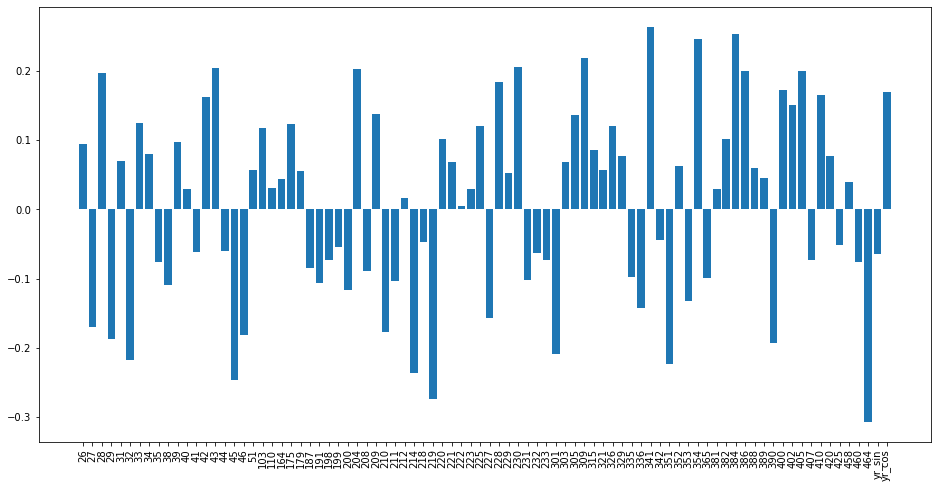

In [197]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense Model

Extension of linear model adding two dense layers with 64 cells each.

In [198]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
tr_performance['Dense'] = dense.evaluate(single_step_window.train, verbose=0)
val_performance['Dense'] = dense.evaluate(single_step_window.val, verbose=0)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

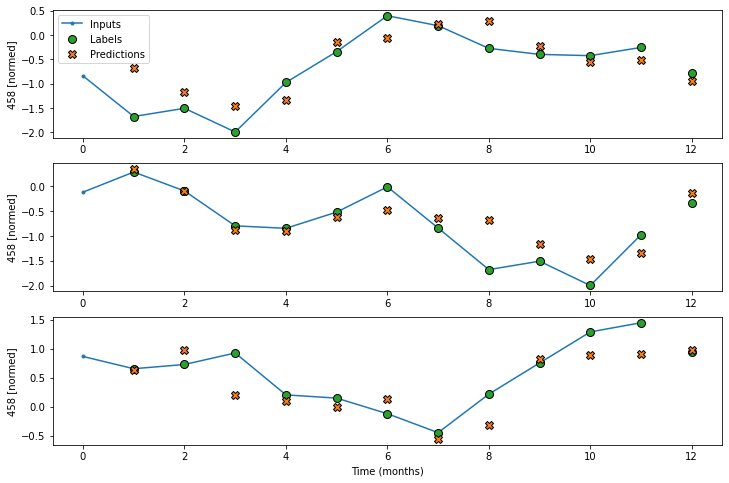

In [199]:
wide_window.plot(dense)

### Convolutional Model

Doesn't entirely belong in the single-step models, but takes three months of data and treats it as a single month.

In [230]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['458'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['458']

In [207]:
LABEL_WIDTH = 12
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['458'])

wide_conv_window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14]
Label column name(s): ['458']

In [208]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [209]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
tr_performance['Conv'] = conv_model.evaluate(conv_window.train, verbose=0)
val_performance['Conv'] = conv_model.evaluate(conv_window.val, verbose=0)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

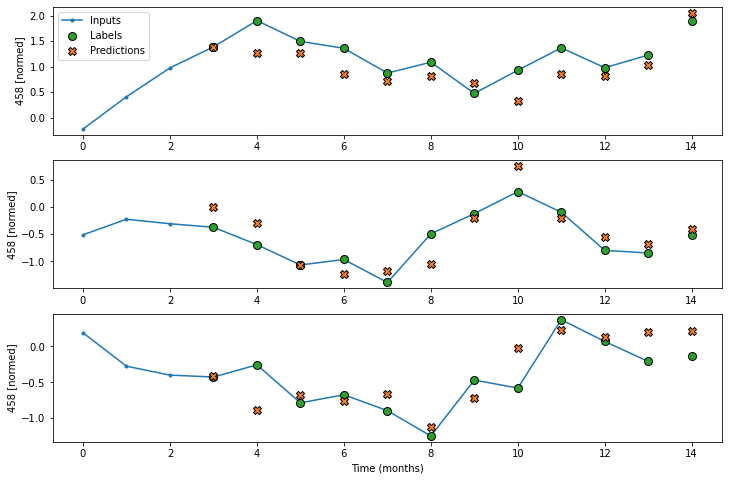

In [210]:
wide_conv_window.plot(conv_model)

### RNN Model

A model using a simple RNN.

In [215]:
rnn_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    # Must include batch_input_shape according to https://github.com/tensorflow/tensorflow/issues/37942
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [216]:
history = compile_and_fit(rnn_model, wide_window)

IPython.display.clear_output()
tr_performance['RNN'] = rnn_model.evaluate(wide_window.train, verbose=0)
val_performance['RNN'] = rnn_model.evaluate(wide_window.val, verbose=0)
performance['RNN'] = rnn_model.evaluate(wide_window.test, verbose=0)

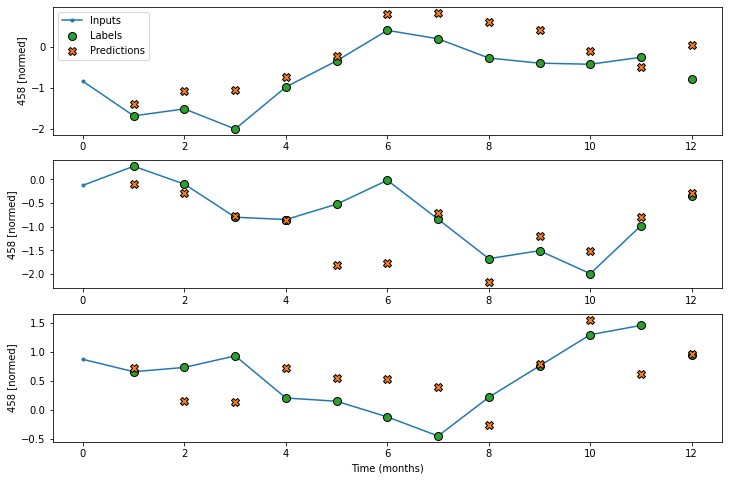

In [217]:
wide_window.plot(rnn_model)

### LSTM Model

Single-(output) step, single-output model using an LSTM layer.

In [218]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    # Must include batch_input_shape according to https://github.com/tensorflow/tensorflow/issues/37942
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [219]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
tr_performance['LSTM'] = lstm_model.evaluate(wide_window.train, verbose=0)
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, verbose=0)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

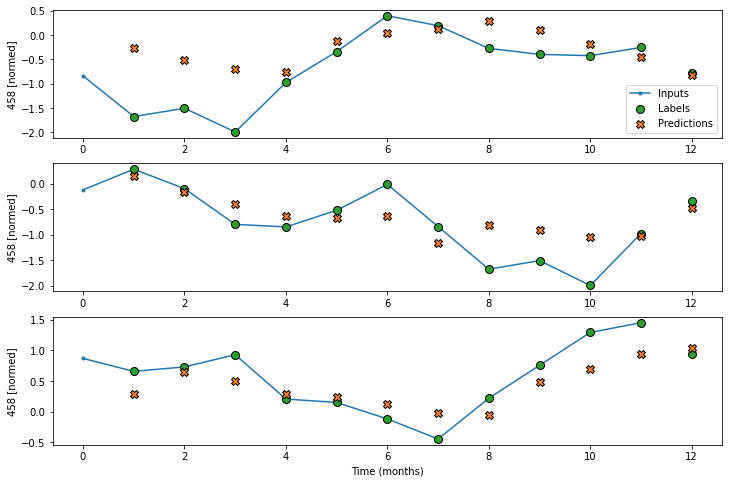

In [220]:
wide_window.plot(lstm_model)

### GRU Model

In [261]:
gru_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    # Must include batch_input_shape according to https://github.com/tensorflow/tensorflow/issues/37942
    tf.keras.layers.GRU(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

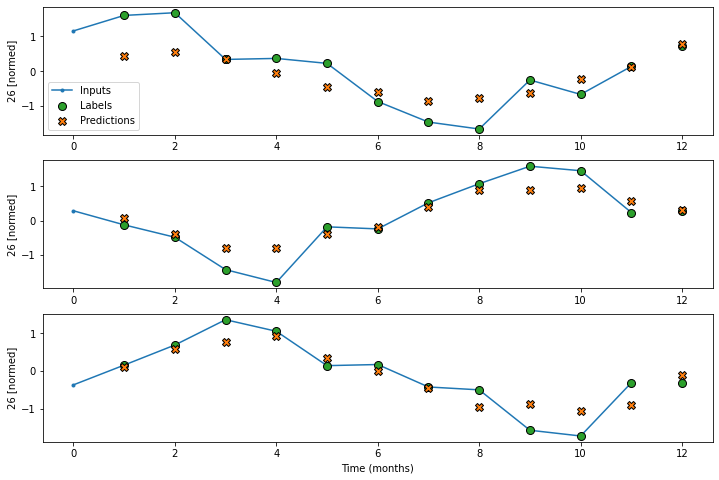

In [262]:
history = compile_and_fit(gru_model, wide_window)

IPython.display.clear_output()
tr_performance['GRU'] = gru_model.evaluate(wide_window.train, verbose=0)
val_performance['GRU'] = gru_model.evaluate(wide_window.val, verbose=0)
performance['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

wide_window.plot(gru_model)

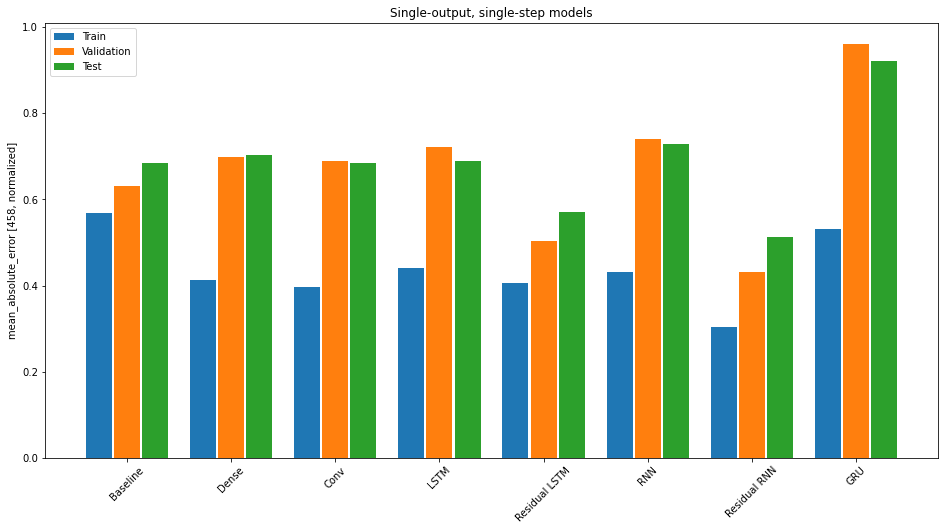

In [263]:
x = np.arange(len(performance))
width = 0.25
offset = 0.27
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
tr_mae = [v[metric_index] for v in tr_performance.values()]
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [458, normalized]')
plt.bar(x - offset, tr_mae, width, label='Train')
plt.bar(x, val_mae, width, label='Validation')
plt.bar(x + offset, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.title('Single-output, single-step models')
_ = plt.legend()

## Multi-Output Models

Predicts for all label columns, not just a single one.

In [223]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 12, 86)
Labels shape (batch, time, features): (32, 12, 86)


### Baseline Model

In [224]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [225]:
tr_performance = {}
val_performance = {}
performance = {}

IPython.display.clear_output()
tr_performance['Baseline'] = baseline.evaluate(wide_window.train, verbose=0)
val_performance['Baseline'] = baseline.evaluate(wide_window.val, verbose=0)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

### Dense Model

In [226]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [227]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
tr_performance['Dense'] = dense.evaluate(single_step_window.train, verbose=0)
val_performance['Dense'] = dense.evaluate(single_step_window.val, verbose=0)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

### Convolutional Model

In [231]:
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1)


In [228]:
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1)

In [232]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=num_features),
])

In [233]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
tr_performance['Conv'] = conv_model.evaluate(conv_window.train, verbose=0)
val_performance['Conv'] = conv_model.evaluate(conv_window.val, verbose=0)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

### RNN Model

In [239]:
%%time
rnn_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    # Must include batch_input_shape according to https://github.com/tensorflow/tensorflow/issues/37942
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(rnn_model, wide_window)

IPython.display.clear_output()
tr_performance['RNN'] = rnn_model.evaluate(wide_window.train, verbose=0)
val_performance['RNN'] = rnn_model.evaluate(wide_window.val, verbose=0)
performance['RNN'] = rnn_model.evaluate(wide_window.test, verbose=0)

Wall time: 5.23 s


### LSTM Model

In [234]:
%%time
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
tr_performance['LSTM'] = lstm_model.evaluate(wide_window.train, verbose=0)
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, verbose=0)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Wall time: 5.91 s


### GRU Model

In [264]:
%%time
gru_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(gru_model, wide_window)

IPython.display.clear_output()
tr_performance['GRU'] = gru_model.evaluate(wide_window.train, verbose=0)
val_performance['GRU'] = gru_model.evaluate(wide_window.val, verbose=0)
performance['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

Wall time: 6 s


### Residual RNN

Iterative model built on RNN.

In [142]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)

        # The prediction for each timestep is the input
        # from the previous time step plus the delta
        # calculated by the model.
        return inputs + delta

In [240]:
%%time
residual_rnn = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_rnn, wide_window)

IPython.display.clear_output()
tr_performance['Residual RNN'] = residual_rnn.evaluate(wide_window.train, verbose=0)
val_performance['Residual RNN'] = residual_rnn.evaluate(wide_window.val, verbose=0)
performance['Residual RNN'] = residual_rnn.evaluate(wide_window.test, verbose=0)

Wall time: 5.26 s


### Residual LSTM

An iterative model built on LSTM.

In [236]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
tr_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.train, verbose=0)
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val, verbose=0)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)

Wall time: 5.08 s


### Residual GRU

In [265]:
%%time
residual_gru = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_gru, wide_window)

IPython.display.clear_output()
tr_performance['Residual GRU'] = residual_gru.evaluate(wide_window.train, verbose=0)
val_performance['Residual GRU'] = residual_gru.evaluate(wide_window.val, verbose=0)
performance['Residual GRU'] = residual_gru.evaluate(wide_window.test, verbose=0)

Wall time: 5.22 s


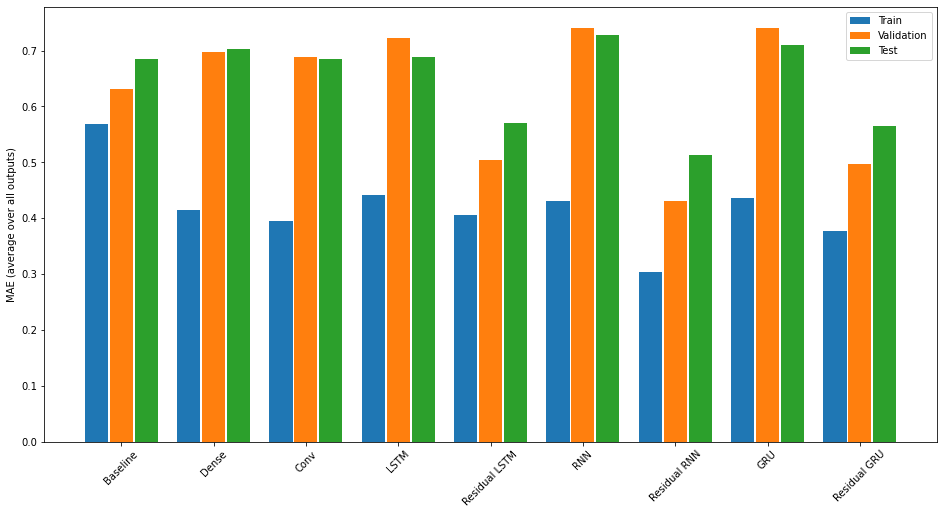

In [266]:
x = np.arange(len(performance))
width = 0.25
offset = 0.27

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
tr_mae = [v[metric_index] for v in tr_performance.values()]
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [28, normalized]')
plt.bar(x - offset, tr_mae, width, label='Train')
plt.bar(x, val_mae, width, label='Validation')
plt.bar(x + offset, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all outputs)')
_ = plt.legend()

In [267]:
for name, value in performance.items():
    print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.6857
Dense          : 0.7026
Conv           : 0.6852
LSTM           : 0.6882
Residual LSTM  : 0.5712
RNN            : 0.7277
Residual RNN   : 0.5127
GRU            : 0.7108
Residual GRU   : 0.5647


# Multi-Step Input

Use multiple steps for input, rather than just one.

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): None

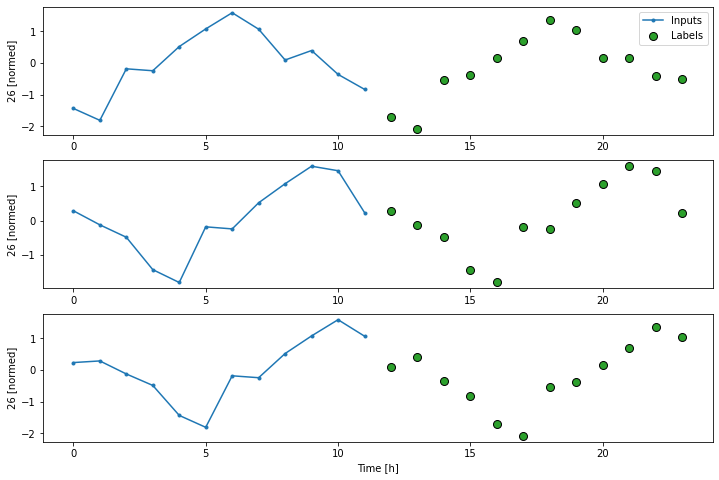

In [153]:
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=OUT_STEPS,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baseline Models

### Multi-Step Last Baseline

Repeats the last input over the output window.

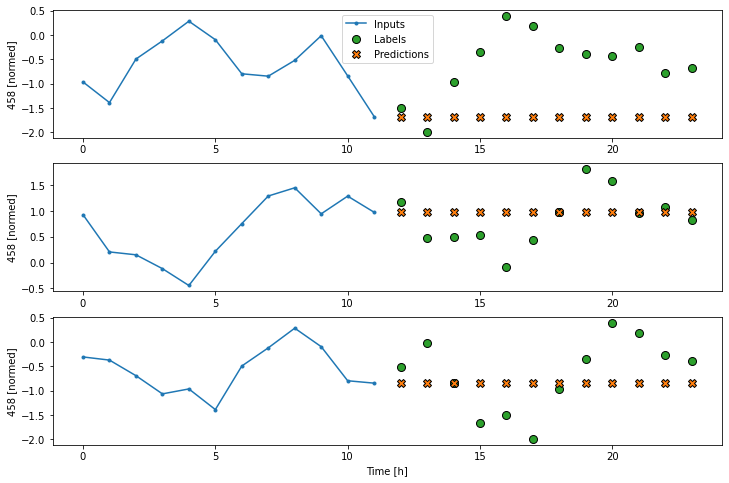

In [245]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_train_performance = {}
multi_val_performance = {}
multi_performance = {}

IPython.display.clear_output()
multi_train_performance['Last'] = last_baseline.evaluate(multi_window.train, verbose=0)
multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline, '458')

### Repeat Baseline

Repeats the last 12 months worth of inputs.

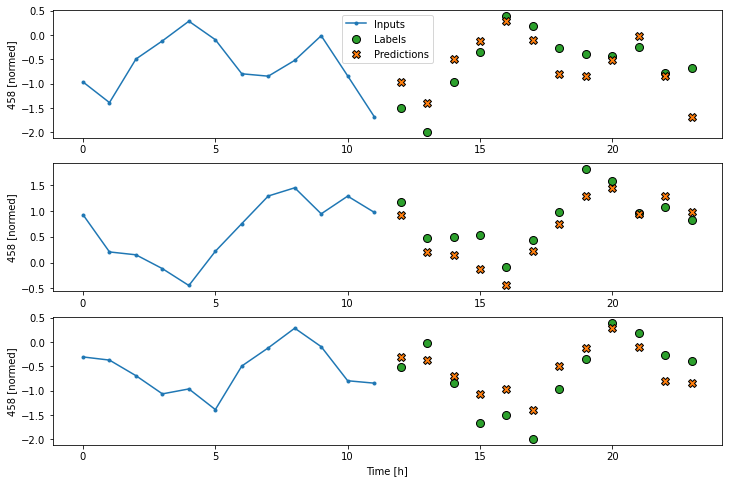

In [246]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

IPython.display.clear_output()
multi_train_performance['Repeat'] = repeat_baseline.evaluate(multi_window.train, verbose=0)
multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val, verbose=0)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline, '458')

## Single-Prediction Models

For each output interval, makes a single prediction based off of the input.

### Linear Model

Wall time: 3.66 s


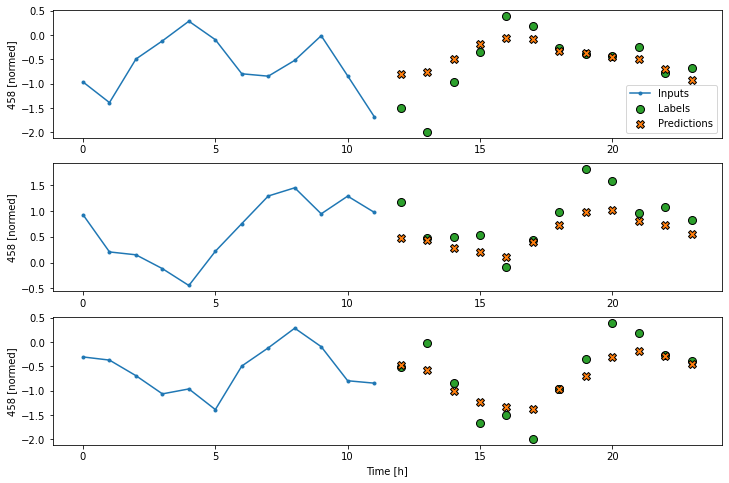

In [249]:
%%time
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_train_performance['Linear'] = multi_linear_model.evaluate(multi_window.train, verbose=0)
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val, verbose=0)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model, '458')

### Dense Model

Wall time: 2.16 s


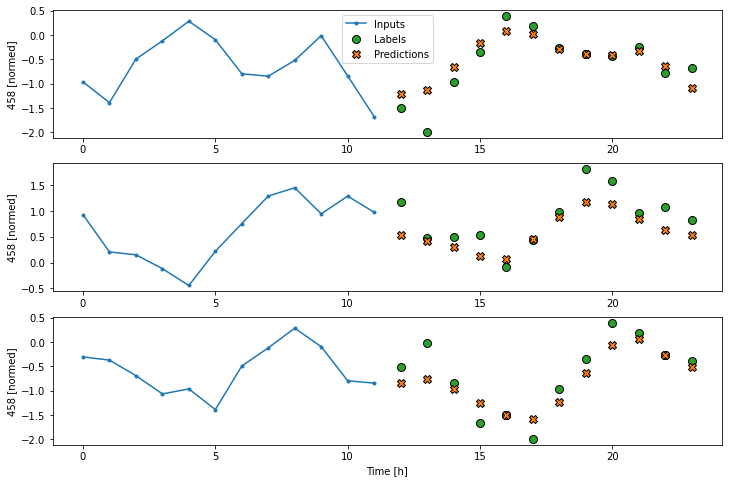

In [250]:
%%time
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_train_performance['Dense'] = multi_dense_model.evaluate(multi_window.train, verbose=0)
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, verbose=0)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model, '458')

### Convolutional Model

Wall time: 2.52 s


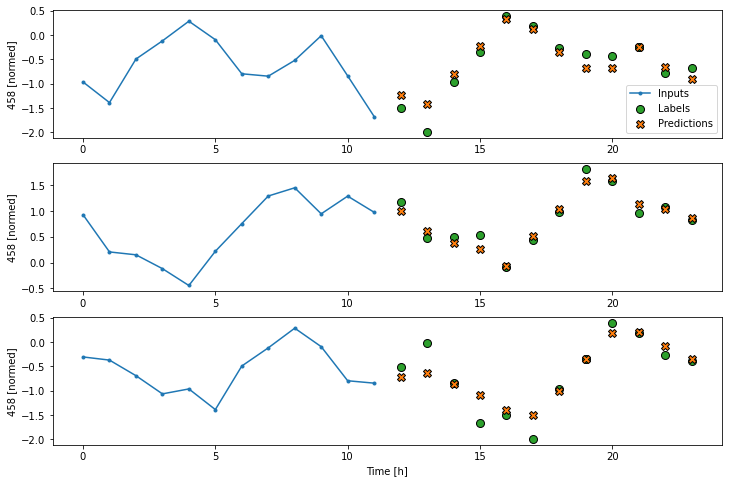

In [257]:
%%time
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()
multi_train_performance['Conv'] = multi_conv_model.evaluate(multi_window.train, verbose=0)
multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, verbose=0)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model, '458')

### RNN Model

Wall time: 5.11 s


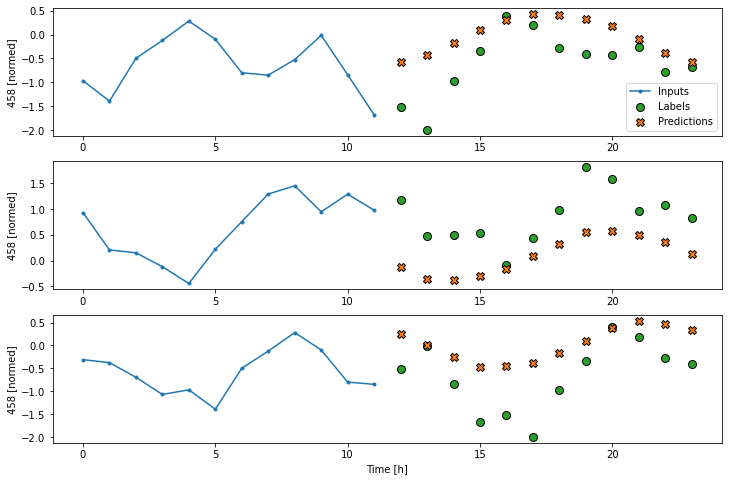

In [258]:
%%time
multi_rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_rnn_model, multi_window)

IPython.display.clear_output()
multi_train_performance['RNN'] = multi_rnn_model.evaluate(multi_window.train, verbose=0)
multi_val_performance['RNN'] = multi_rnn_model.evaluate(multi_window.val, verbose=0)
multi_performance['RNN'] = multi_rnn_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_rnn_model, '458')

### LSTM Model

Wall time: 5.89 s


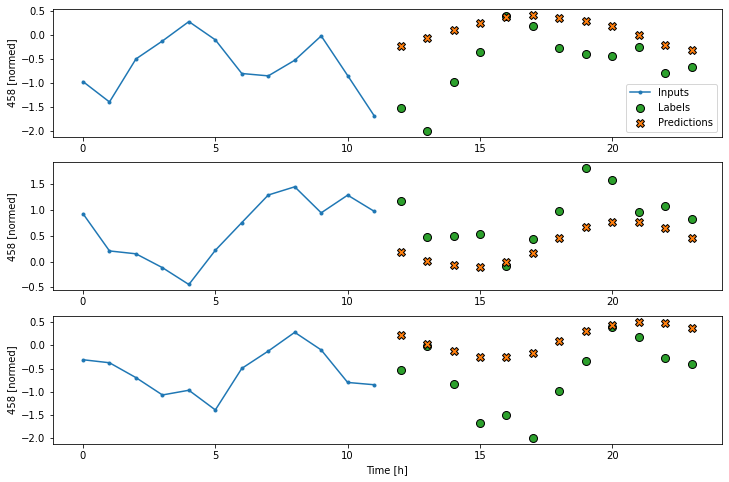

In [259]:
%%time
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()
multi_train_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.train, verbose=0)
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, verbose=0)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model, '458')

### GRU Model

Wall time: 5.04 s


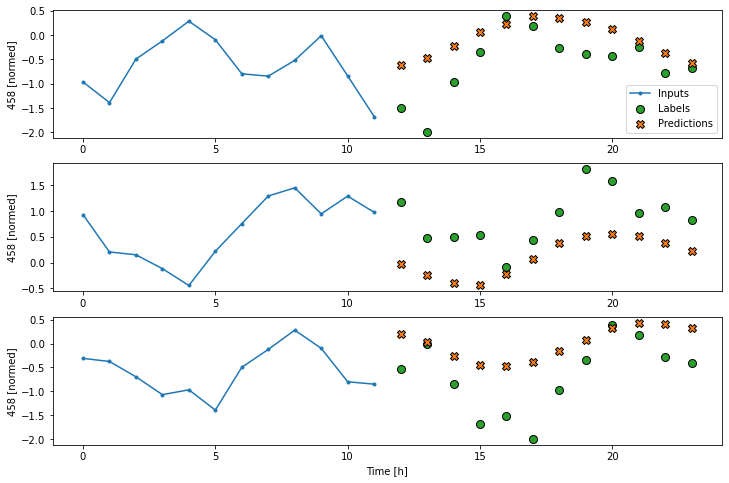

In [268]:
%%time
multi_gru_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.GRU(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_gru_model, multi_window)

IPython.display.clear_output()
multi_train_performance['GRU'] = multi_gru_model.evaluate(multi_window.train, verbose=0)
multi_val_performance['GRU'] = multi_gru_model.evaluate(multi_window.val, verbose=0)
multi_performance['GRU'] = multi_gru_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_gru_model, '458')

## Autoregressive Models

Models with iterative/auto-regressive predictions. 

In [271]:
class AutoRegressive(tf.keras.Model):
    def __init__(self, units, cell, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
#         self.lstm_cell = tf.keras.layers.LSTMCell(units)
        self.ar_cell = cell(units)
        # Also wrap the cell in an RNN to simplify the `warmup` method.
        self.ar_rnn = tf.keras.layers.RNN(self.ar_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)
        
    def warmup(self, inputs):
        # inputs.shape => (batch, time, features)
        # x.shape => (batch, lstm_units)
        x, *state = self.ar_rnn(inputs)

        # predictions.shape => (batch, features)
        prediction = self.dense(x)
        return prediction, state        

    def call(self, inputs, training=None):
        # Use a TensorArray to capture dynamically unrolled outputs.
        predictions = []
        # Initialize the lstm state
        prediction, state = self.warmup(inputs)

        # Insert the first prediction
        predictions.append(prediction)

        # Run the rest of the prediction steps
        for n in range(1, self.out_steps):
            # Use the last prediction as input.
            x = prediction
            # Execute one lstm step.
            x, state = self.ar_cell(x, states=state,
                                      training=training)
            # Convert the lstm output to a prediction.
            prediction = self.dense(x)
            # Add the prediction to the output
            predictions.append(prediction)

        # predictions.shape => (time, batch, features)
        predictions = tf.stack(predictions)
        # predictions.shape => (batch, time, features)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions

### Auto-Regressive RNN

In [272]:
ar_rnn = AutoRegressive(units=32, cell=tf.keras.layers.SimpleRNNCell, out_steps=OUT_STEPS)

Wall time: 4.47 s


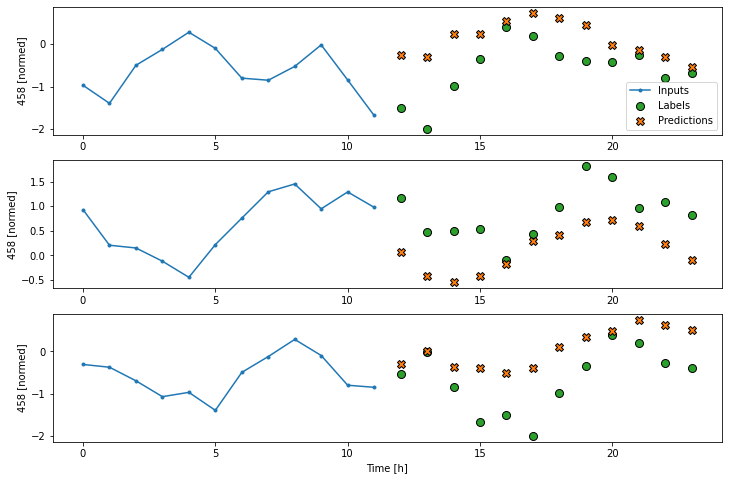

In [276]:
%%time
MAX_EPOCHS = 20
history = compile_and_fit(ar_rnn, multi_window)

IPython.display.clear_output()
multi_train_performance['AR RNN'] = ar_rnn.evaluate(multi_window.train, verbose=0)
multi_val_performance['AR RNN'] = ar_rnn.evaluate(multi_window.val, verbose=0)
multi_performance['AR RNN'] = ar_rnn.evaluate(multi_window.test, verbose=0)
multi_window.plot(ar_rnn, '458')

### Auto-Regressive LSTM

In [277]:
ar_lstm = AutoRegressive(units=32, cell=tf.keras.layers.LSTMCell, out_steps=OUT_STEPS)

Wall time: 11 s


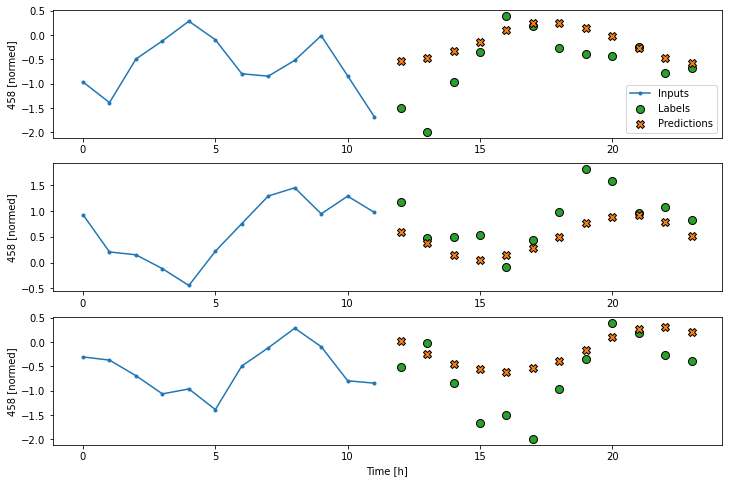

In [278]:
%%time
MAX_EPOCHS = 20
history = compile_and_fit(ar_lstm, multi_window)

IPython.display.clear_output()
multi_train_performance['AR LSTM'] = ar_lstm.evaluate(multi_window.train, verbose=0)
multi_val_performance['AR LSTM'] = ar_lstm.evaluate(multi_window.val, verbose=0)
multi_performance['AR LSTM'] = ar_lstm.evaluate(multi_window.test, verbose=0)
multi_window.plot(ar_lstm, '458')

### Auto-Regressive GRU

Wall time: 14.1 s


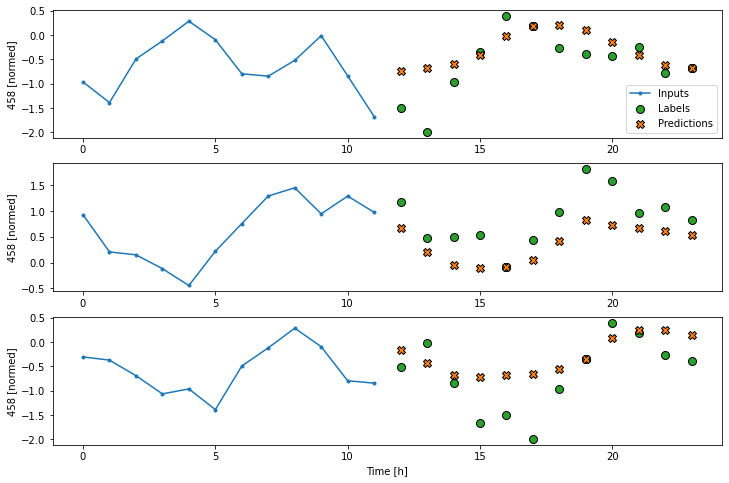

In [281]:
%%time
ar_gru = AutoRegressive(units=32, cell=tf.keras.layers.GRUCell, out_steps=OUT_STEPS)
MAX_EPOCHS = 20
history = compile_and_fit(ar_gru, multi_window)

IPython.display.clear_output()
multi_train_performance['AR GRU'] = ar_gru.evaluate(multi_window.train, verbose=0)
multi_val_performance['AR GRU'] = ar_gru.evaluate(multi_window.val, verbose=0)
multi_performance['AR GRU'] = ar_gru.evaluate(multi_window.test, verbose=0)
multi_window.plot(ar_gru, '458')

### Results

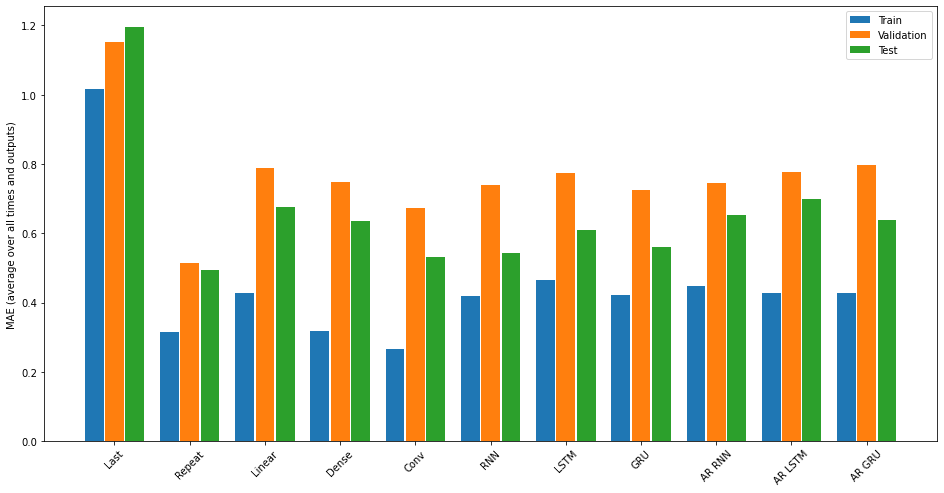

In [282]:
x = np.arange(len(multi_performance))

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
train_mae = [v[metric_index] for v in multi_train_performance.values()]
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - offset, train_mae, width, label='Train')
plt.bar(x, val_mae, width, label='Validation')
plt.bar(x + offset, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(), 
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [283]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')

Last    : 1.1950
Repeat  : 0.4948
Linear  : 0.6765
Dense   : 0.6341
Conv    : 0.5325
RNN     : 0.5435
LSTM    : 0.6081
GRU     : 0.5591
AR RNN  : 0.6529
AR LSTM : 0.6976
AR GRU  : 0.6377


In [300]:
mp = {name: value[1] for name, value in multi_performance.items()}
best_model = min(mp, key=mp.get)
print(f'Best MAE from {best_model}: {mp[best_model]:0.4f}')

Best MAE from Repeat: 0.4948


Wall time: 17.4 s


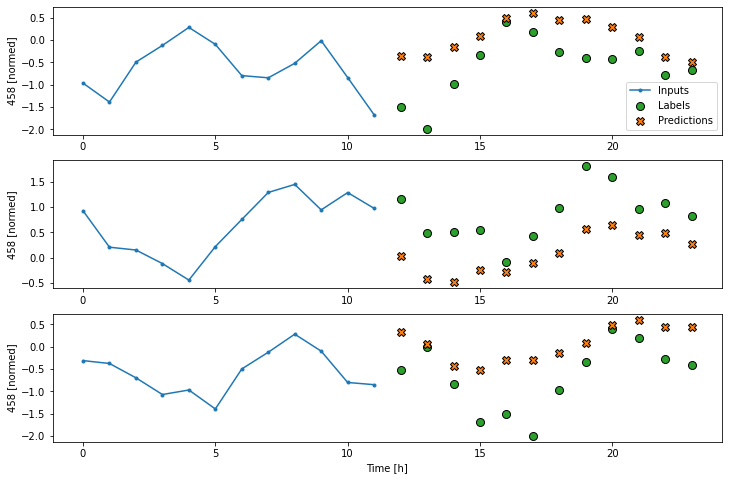

In [317]:
%%time
cells = 64
multi_rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(cells, return_sequences=True),
    tf.keras.layers.SimpleRNN(cells, return_sequences=True),
    tf.keras.layers.SimpleRNN(cells, return_sequences=True),
    tf.keras.layers.SimpleRNN(cells, return_sequences=True),
    tf.keras.layers.SimpleRNN(cells, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_rnn_model, multi_window)

IPython.display.clear_output()
multi_train_performance['Multi RNN'] = multi_rnn_model.evaluate(multi_window.train, verbose=0)
multi_val_performance['Multi RNN'] = multi_rnn_model.evaluate(multi_window.val, verbose=0)
multi_performance['Multi RNN'] = multi_rnn_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_rnn_model, '458')

In [318]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')

Last    : 1.1950
Repeat  : 0.4948
Linear  : 0.6765
Dense   : 0.6341
Conv    : 0.5325
RNN     : 0.5435
LSTM    : 0.6081
GRU     : 0.5591
AR RNN  : 0.6529
AR LSTM : 0.6976
AR GRU  : 0.6377
Multi RNN: 0.4885


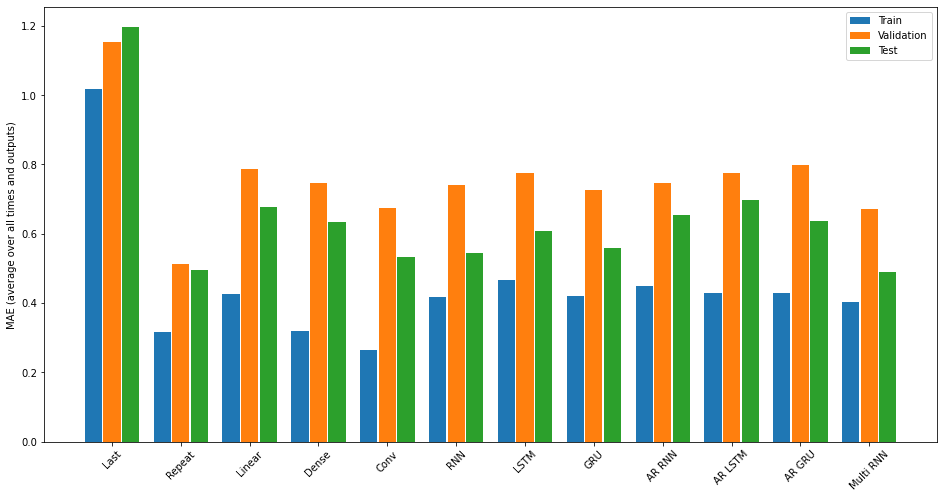

In [319]:
x = np.arange(len(multi_performance))

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
train_mae = [v[metric_index] for v in multi_train_performance.values()]
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - offset, train_mae, width, label='Train')
plt.bar(x, val_mae, width, label='Validation')
plt.bar(x + offset, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(), 
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
tt_imputed_full_file_name = 'Data/test_train_imputed.pkl'
df = pd.read_pickle(tt_imputed_full_file_name)